# Градиентый спсук

Градиентный спуск — метод нахождения минимального значения функции потерь.


 В методе градиентного спуска нам дается начальное приближение $w_0$
. Метод градиентного спуска носит итерационный характер: мы вычисляем последовательность приближений $w_0, w_1, w_2, w_3, …$
, в которой текущая точка движется к точке минимума.

Параметром в методе градиентного спуска является размер шага $α$ (скоростью обучения — learning rate). Пусть $w_k$
 — очередное приближение, тогда следующее приближение вычисляется по формуле:
$w_{k+1} = w_k − α ⋅ ∇f(w_k)$.\
$∇f(w_k)$
  — вектор градиента функции $f$
 в точке $w_k$
, указывающий направление роста функции.\
Мы смещаемся в направлении убывания функции на величину $α ⋅ ∇f(w_k)$





Будем работать с функцией потерь MSELoss
$E = \frac{1}{N} \sum_{i=1}^{N} (y_i - f(x_i)) ^ 2$

# Линеаризация

Модель\
$y = ax + b$\
Функция потерь\
$E = \frac{1}{N} \sum_{i=1}^{N} (y_i - ax_i - b) ^ 2$\
Градиенты\
$\frac{\partial E}{\partial a} = -\frac{2}{N} \sum_{i=1}^{N} (y_i - ax_i - b) \cdot x_i $\
$\frac{\partial E}{\partial b} = -\frac{2}{N} \sum_{i=1}^{N} (y_i - ax_i - b) \cdot 1 $

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# загружаем датасет
data = pd.read_csv('https://drive.google.com/uc?id=1KdqBqdHV11UV9jhq2dYRke7vuU0RwQRg')
data = data.drop_duplicates()
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


Разделяем данные и задаем начальные значения

In [ ]:
X = np.array(data['YearsExperience'])
Y = np.array(data['Salary'])

# случайные значения
a = np.random.randn(1)
b = np.random.randn(1)
print(f'start with f = {b[0]} + {a[0]}x (random coefs)')

# размер шага
lr = 0.01
# количество эпох
n_epochs = 10000

start with f = -0.32139380330104367 + -0.45878581436317595x (random coefs)


Основной цикл

In [ ]:
for epoch in range(n_epochs):
    yhat = b + a * X

    # 1. определяем лосс
    # считаем отклонение нового результата от обучающего:
    error = (Y - yhat)

    # 2. считаем градиенты
    # для коэффициента a
    a_grad = -2 * (X * error).mean()
    # для коэффициента b
    b_grad = -2 * (error).mean()

    # 3. обновляем параметры, используя коэффициент скорости обучения
    a = a - lr * a_grad
    b = b - lr * b_grad
print(f'result of gradient boosting f = {b[0]} + {a[0]}x')

result of gradient boosting f = 25792.20019866825 + 9449.962321455143x


Отрисовка

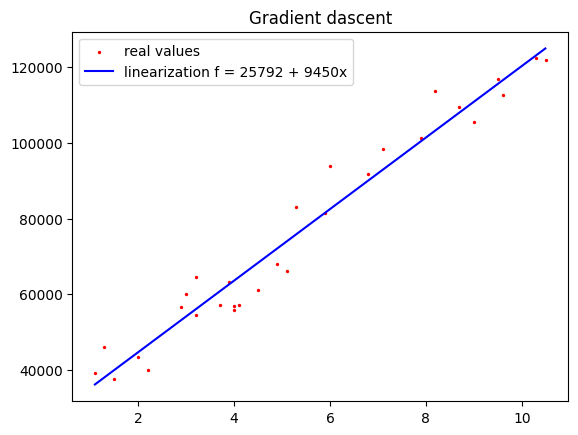

In [ ]:
plt.scatter(X, Y, s=2, c='red')
x = np.arange(min(X), max(X), 0.01)
plt.plot(x, a*x+b, c='blue')
plt.legend (('real values', f'linearization f = {round(b[0])} + {round(a[0])}x'))
plt.title('Gradient dascent')
plt.show()

# Линейная регрессия

Модель (n - кол-во признаков)\
$y = a_0 + a_1x_1 + ... + a_nx_n $\
Функция потерь\
$E = \frac{1}{N} \sum_{i=1}^{N} (y_i - a_nx_{ni} - ... - a_1x_{1i} - a_0) ^ 2$\
Градиенты\
$\frac{\partial E}{\partial a_n} = -\frac{2}{N} \sum_{i=1}^{N} (y_i - a_nx_{ni} - ... - a_1x_{1i} - a_0) \cdot x_{ni} $\
...\
$\frac{\partial E}{\partial a_1} = -\frac{2}{N} \sum_{i=1}^{N} (y_i - a_nx_{ni} - ... - a_1x_{1i} - a_0) \cdot x_{1i} $\
$\frac{\partial E}{\partial a_0} = -\frac{2}{N} \sum_{i=1}^{N} (y_i - a_nx_{ni} - ... - a_1x_{1i} - a_0) \cdot 1 $

In [ ]:
# загружаем датасет
data = pd.read_csv('https://drive.google.com/uc?id=1BCOHKxNJFiTyWND_poH3-tDEe8mfIV2C')
data = data.drop_duplicates()
data.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


переводим категориальные данные в численные

In [ ]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
data['Neighborhood'] = label_encoder.fit_transform(data['Neighborhood'])

добавляем столбец свободных членов и разделяю данные

In [ ]:
data.insert(0, 'Free', [1 for i in range(len(data.index))], True)
data = data.drop_duplicates()
X = np.array(data.iloc[:, :-1])
Y = np.array(data.iloc[:, -1].round(1))
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

Функция, возращающая коэффы линейной регрессии, которые вычисляются с помощью градиентного спуска

In [ ]:
def LinReg_with_gradient_descent(X, y, lr, n_epochs):
  n = X.shape[1]   # количество признаков
  a = np.ones(n)    # изначально все коэффы берем единицы
  yhat = np.dot(X, a)   # предикты
  error = y - yhat

  # Градиентый спуск
  for _ in range(n_epochs):
    a0_grad = -2 * error.mean()
    a[0] = a[0] - lr * a0_grad
    for j in range(1, n):
      aj_grad = -2 * (error * X[:, j]).mean()
      a[j] = a[j] - lr * aj_grad
    yhat = np.dot(X, a)
    error = y - yhat
  return a

In [ ]:
# размер шага
lr = 0.0000001
# количество эпох
n_epochs = 1000

coefs = LinReg_with_gradient_descent(X_train, Y_train, lr, n_epochs)
res = str(round(coefs[0], 2)) + ''.join([f' + {round(coefs[i], 1)}x_{i}' for i in range(1, len(coefs))])
print(f'coefs of linear regression is {res}')

coefs of linear regression is 1.01 + 99.1x_1 + 2.3x_2 + 1.4x_3 + 1.2x_4 + 12.9x_5


посчитаем предикты на тесовой выборке и сравним с действительми значениями

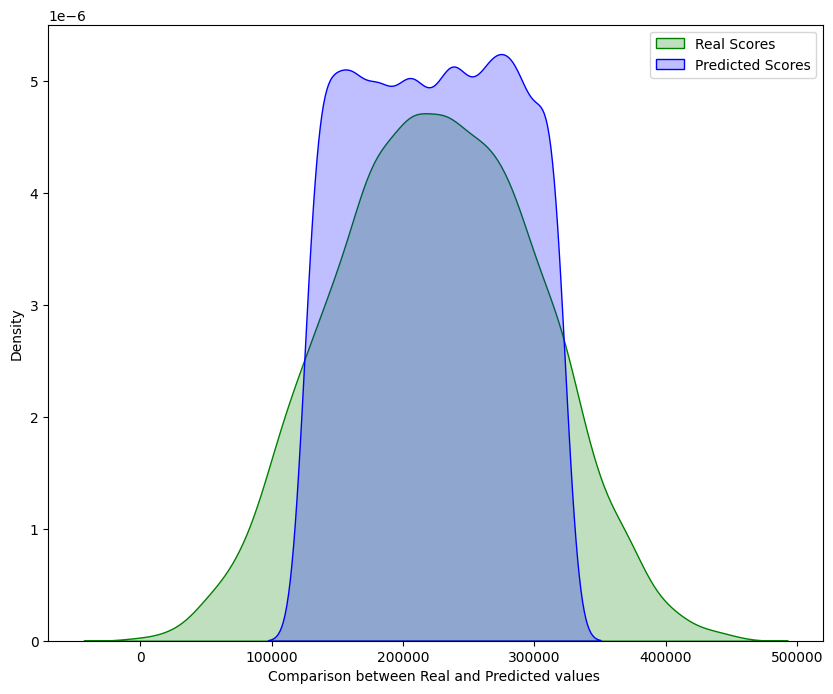

In [ ]:
import seaborn as sns

pred = np.matmul(X_test, coefs)

compare = pd.DataFrame({'Real':Y_test,'Predicted':pred})
compare.reset_index().drop('index',axis=1,inplace=True)

plt.figure(figsize=(10,8))
plt.xlabel('Comparison between Real and Predicted values ')
a=sns.kdeplot(compare['Real'],fill=True,color='g')
b=sns.kdeplot(compare['Predicted'],fill=True, color='b')
plt.legend(labels=['Real Scores','Predicted Scores'])
plt.show()

Сравним с реализацией построения линейной регрессии с помощью готовых функций библиотеки sklearn

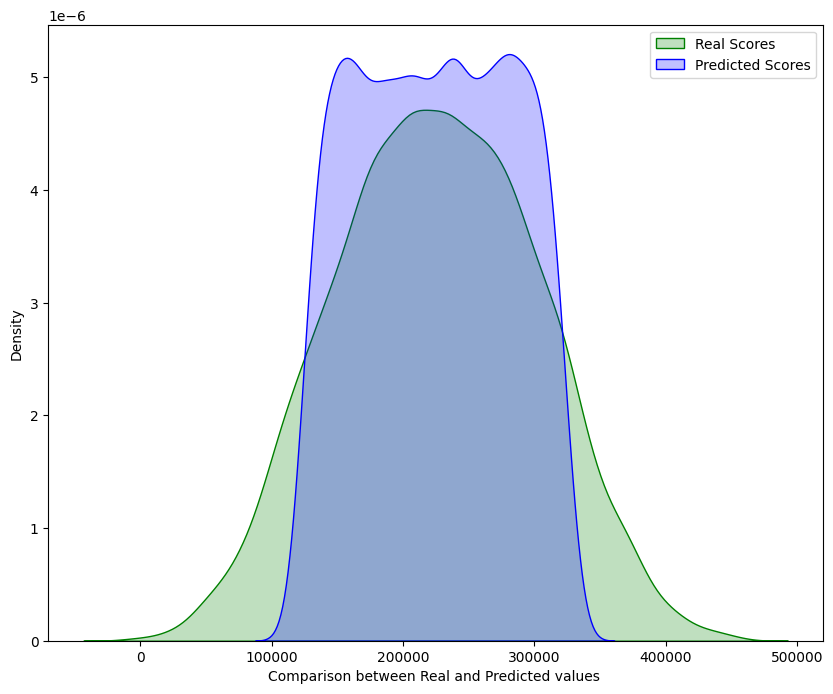

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, Y_train)
pred = lr.predict(X_test)

compare = pd.DataFrame({'Real': Y_test, 'Predicted': pred})
compare.reset_index().drop('index', axis=1, inplace=True)

plt.figure(figsize=(10,8))
plt.xlabel('Comparison between Real and Predicted values ')
a = sns.kdeplot(compare['Real'], fill=True, color='g')
b = sns.kdeplot(compare['Predicted'], fill=True, color='b')
plt.legend(labels=['Real Scores', 'Predicted Scores'])
plt.show()

наверно на другом датасете результат красивее://////

# Регуляризация

Модель (n - кол-во признаков)\
$y = a_0 + a_1x_1 + ... + a_nx_n $\
Функция потерь\
$E = \frac{1}{N} \sum_{i=1}^{N} ((y_i - a_nx_{ni} - ... - a_1x_{1i} - a_0) ^ 2+ λg(a))$\
λ - коэффициент регуляризации, $λg(a)$ - регуляризационный член\
**$L^1$ - норма:**\
$g(a) = \sum_{i=1}^{n}|a_i|$\
Градиенты\
$\frac{\partial E}{\partial a_n} = -\frac{2}{N} \sum_{i=1}^{N} ((y_i - a_nx_{ni} - ... - a_1x_{1i} - a_0) \cdot x_{ni} + λsgn(a_n))$\
...\
$\frac{\partial E}{\partial a_1} = -\frac{2}{N} \sum_{i=1}^{N} ((y_i - a_nx_{ni} - ... - a_1x_{1i} - a_0) \cdot x_{1i} + λsgn(a_1))$\
$\frac{\partial E}{\partial a_0} = -\frac{2}{N} \sum_{i=1}^{N} ((y_i - a_nx_{ni} - ... - a_1x_{1i} - a_0) \cdot 1  + λsgn(a_0))$\
**$L^2$ - норма:**\
$g(a) = \sum_{i=1}^{n}a_i^2$\
Градиенты\
$\frac{\partial E}{\partial a_n} = -\frac{2}{N} \sum_{i=1}^{N} ((y_i - a_nx_{ni} - ... - a_1x_{1i} - a_0) \cdot x_{ni} + λa_n)$\
...\
$\frac{\partial E}{\partial a_1} = -\frac{2}{N} \sum_{i=1}^{N} ((y_i - a_nx_{ni} - ... - a_1x_{1i} - a_0) \cdot x_{1i} + λa_1)$\
$\frac{\partial E}{\partial a_0} = -\frac{2}{N} \sum_{i=1}^{N} ((y_i - a_nx_{ni} - ... - a_1x_{1i} - a_0) \cdot 1  + λa_0)$